You are working as a data scientist in a global
company. Over the years, the company has
collected details and gathered a lot of
information about individuals. The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio-signals. Given a person’s
information, build a machine learning model
that can classify the presence or absence of
smoking.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking.csv')

In [3]:
df = df.drop(columns = ['ID', 'oral'])

In [4]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [5]:
df.shape

(55692, 25)

In [6]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [8]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

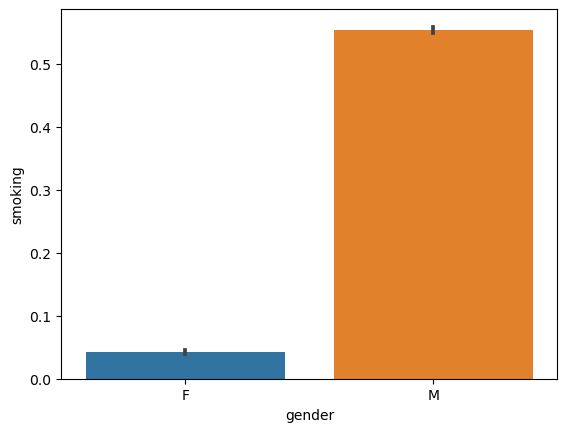

In [9]:
sns.barplot(x=df['gender'], y = df['smoking'])
plt.show()

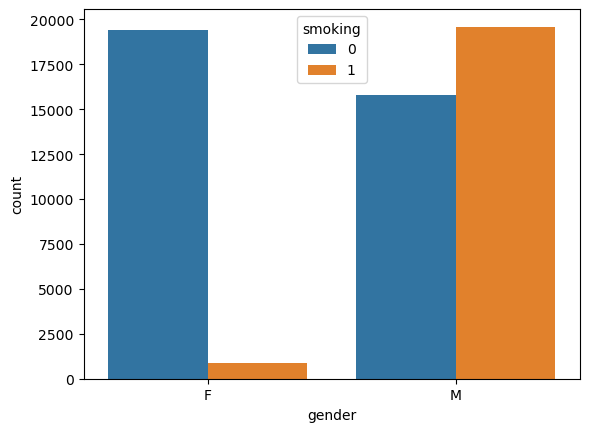

In [10]:
sns.countplot(x = 'gender', hue='smoking', data = df)
plt.show()

<Axes: ylabel='count'>

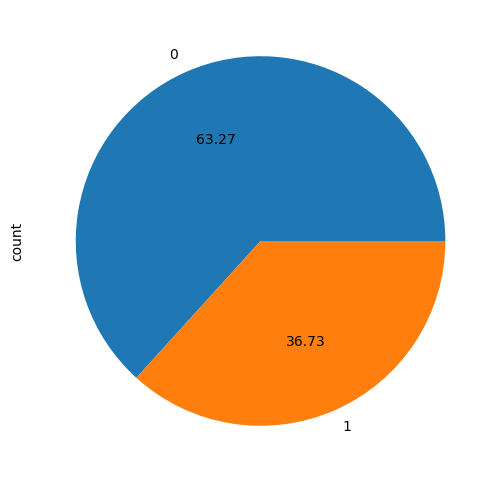

In [11]:
plt.figure(figsize=(10, 6))
df['smoking'].value_counts().plot.pie(autopct='%0.2f')

In [12]:
# There are 36.73 percentage of people smoking ciggarrete.

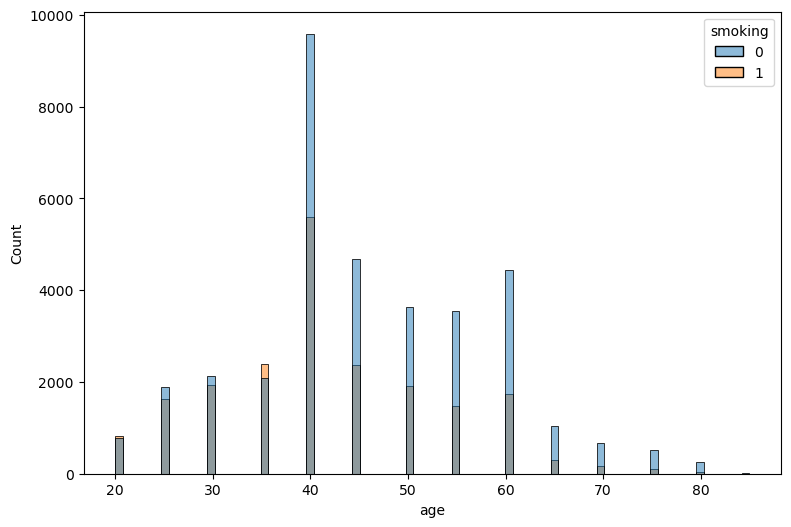

In [13]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['age'], hue=df['smoking'])
plt.show()

In [14]:
# Most number of smoker are having age 40

Representation of columns using boxplot to detect outliers. Here outliers represent natural
variations in the population, and they should be left as is in the dataset. These are called true
outliers. Therefore for this dataset we will not remove outliers.

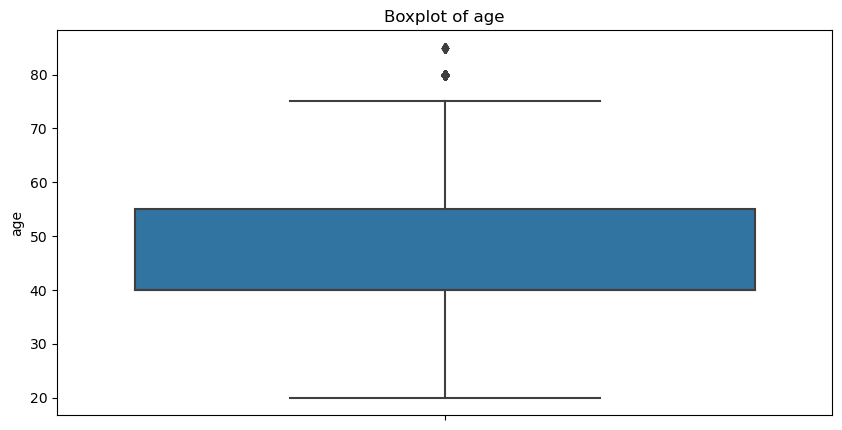

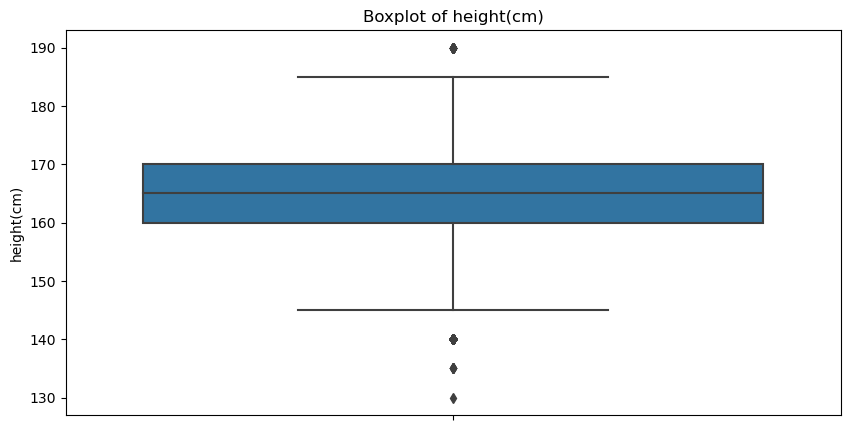

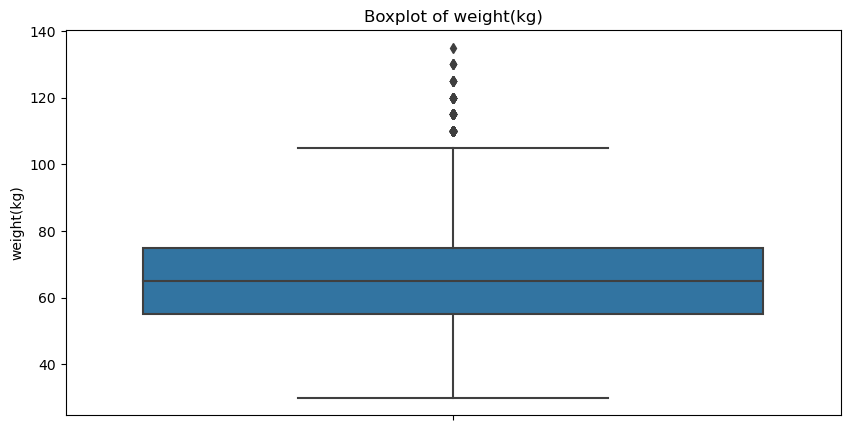

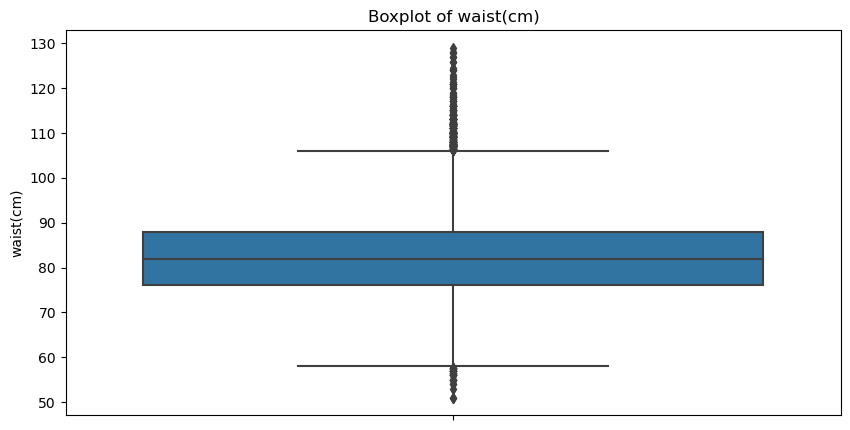

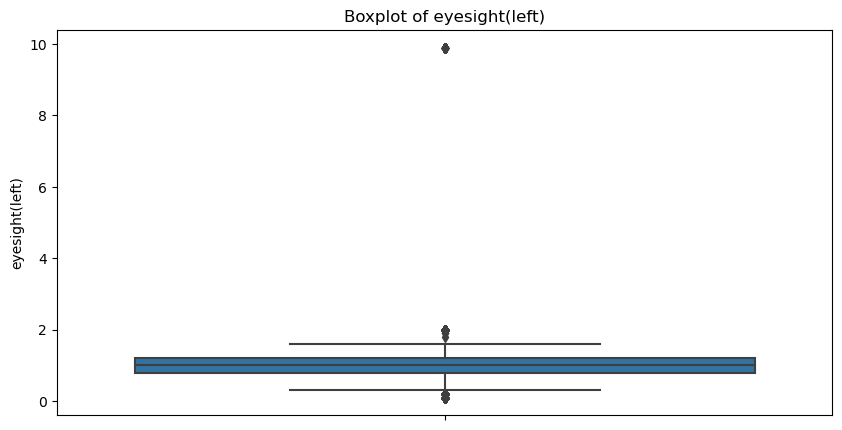

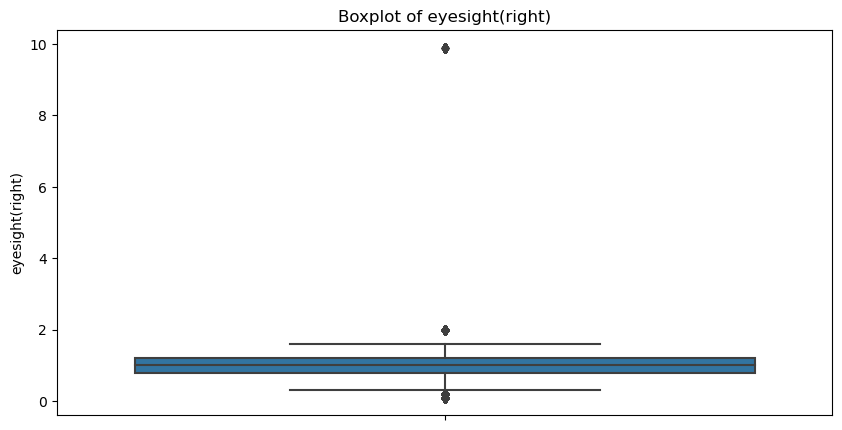

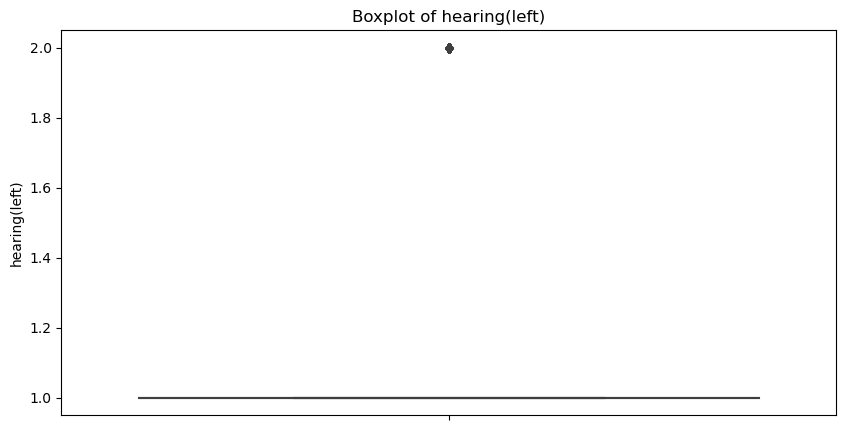

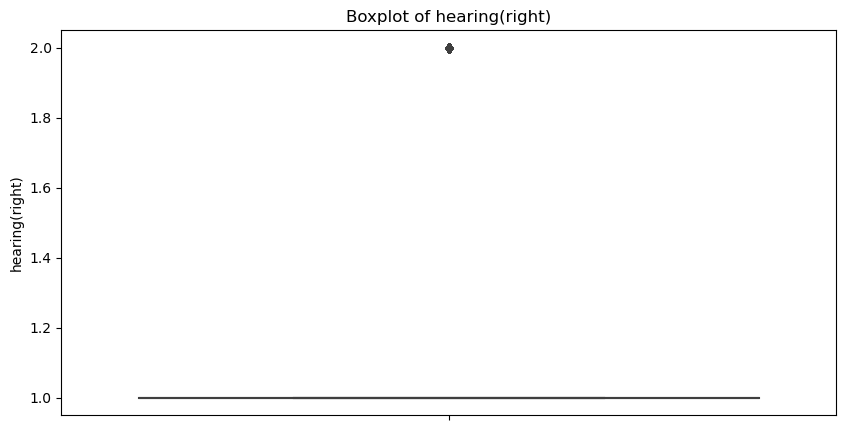

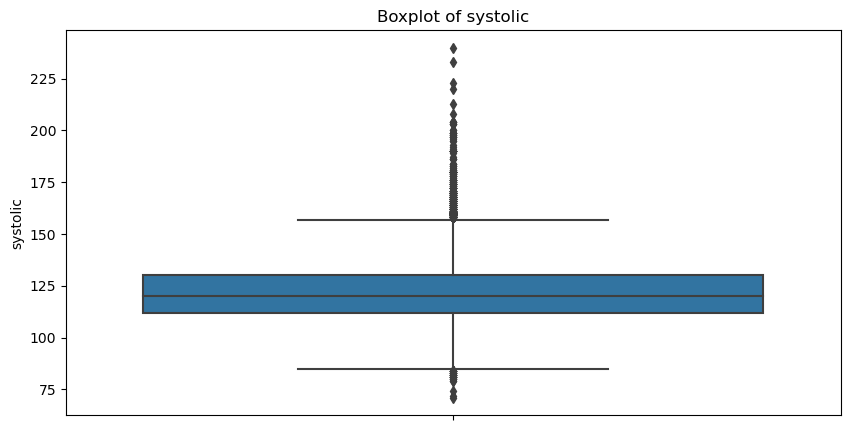

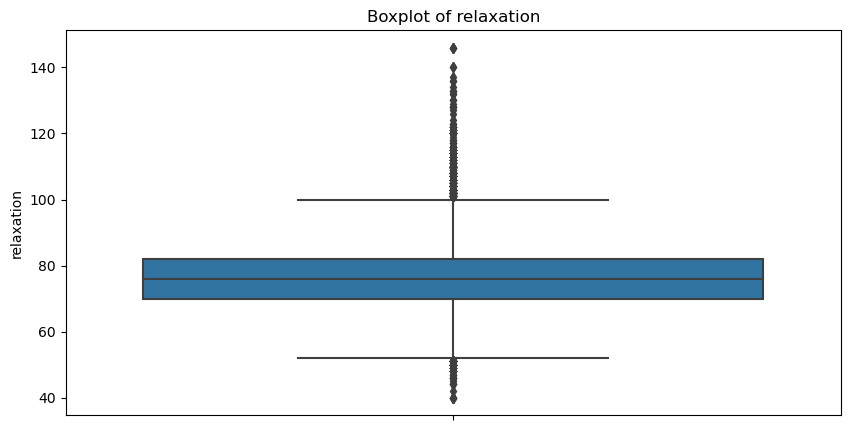

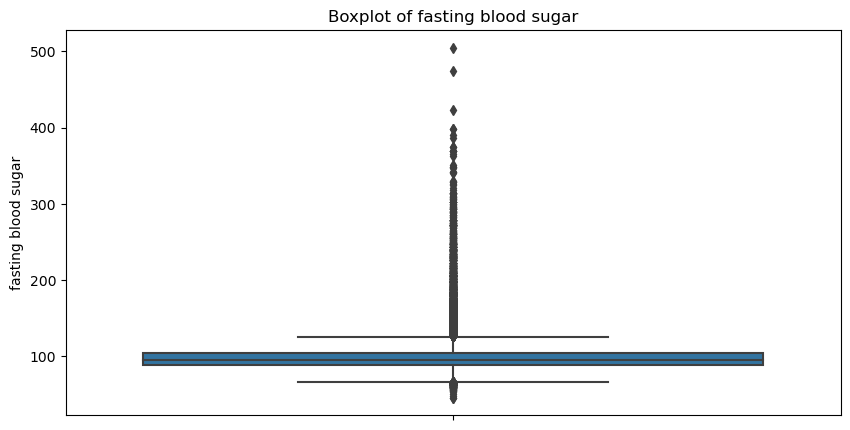

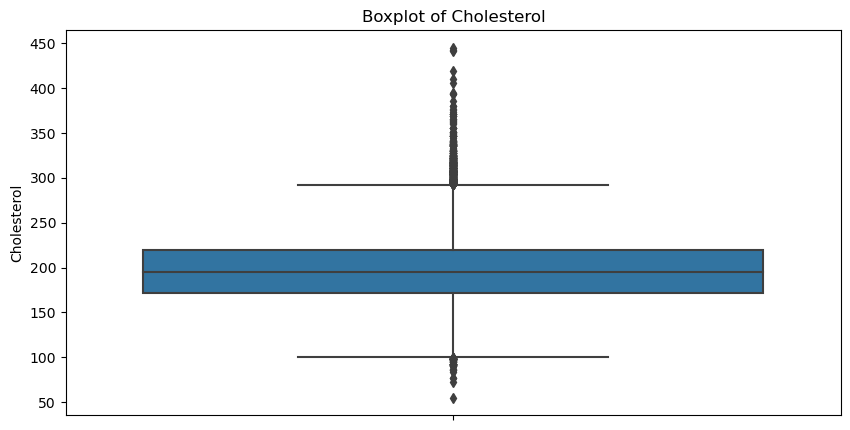

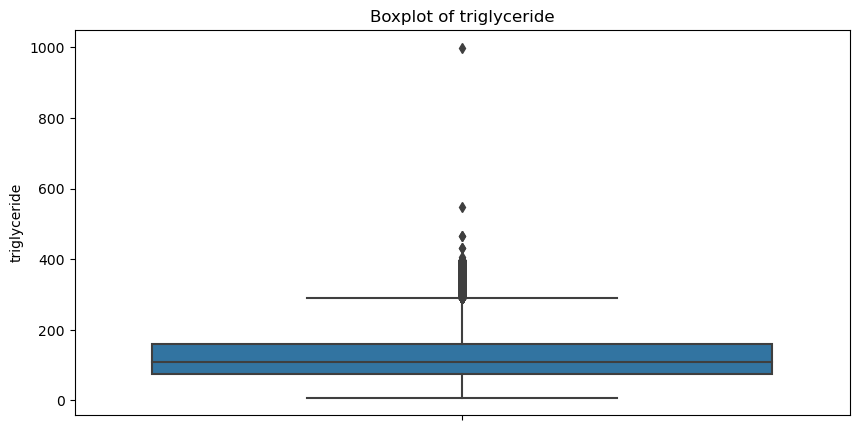

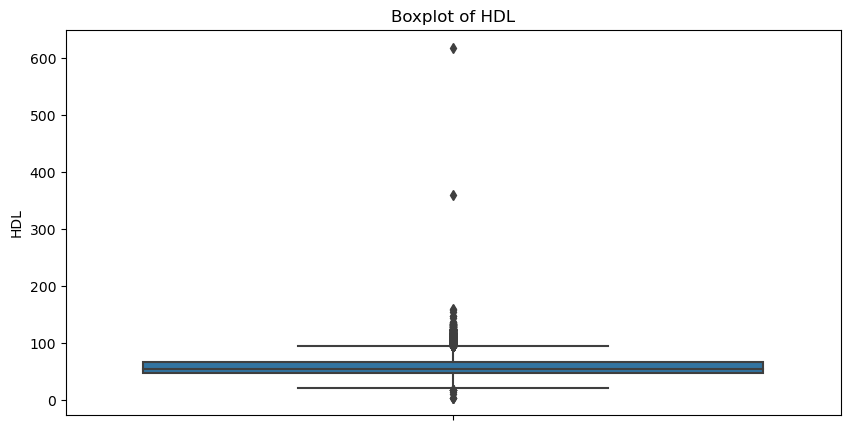

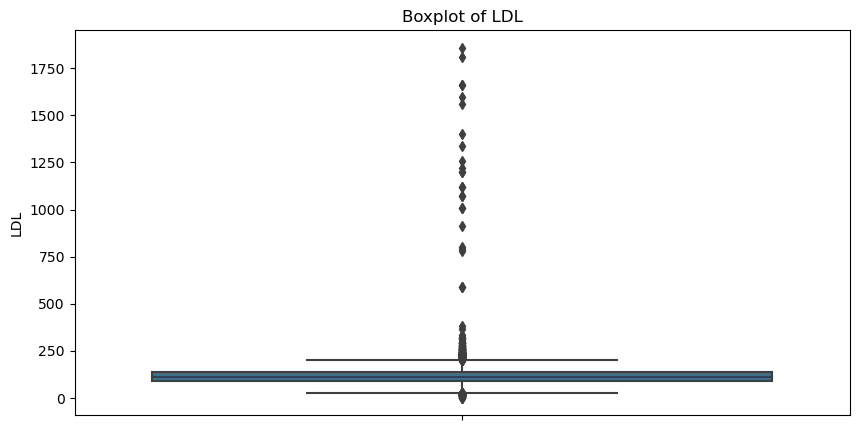

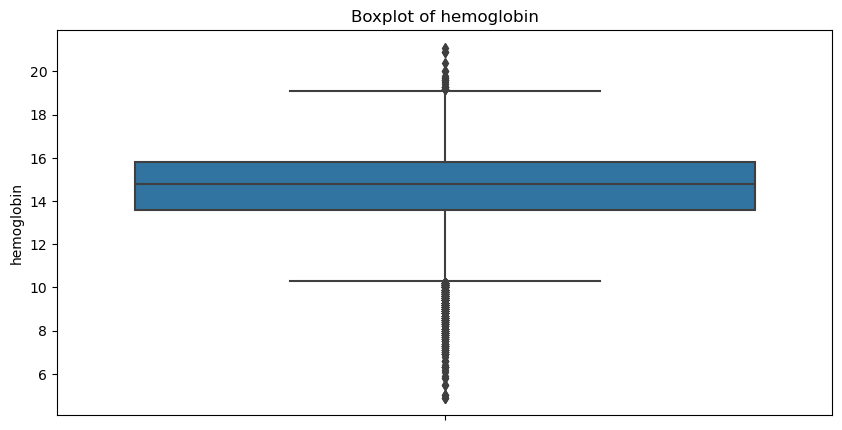

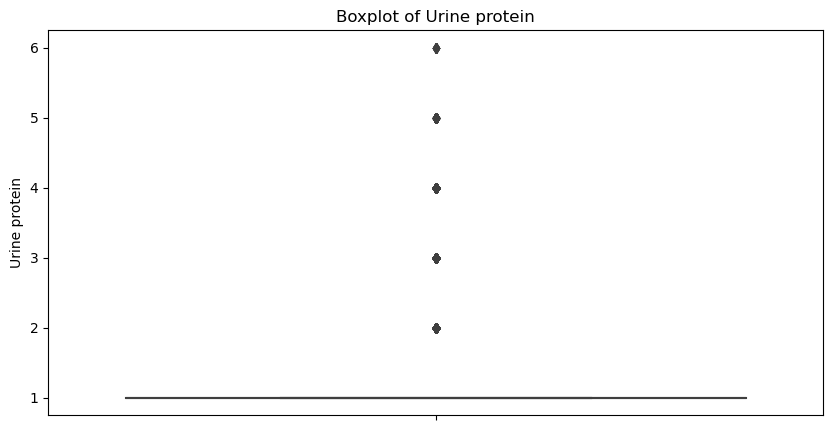

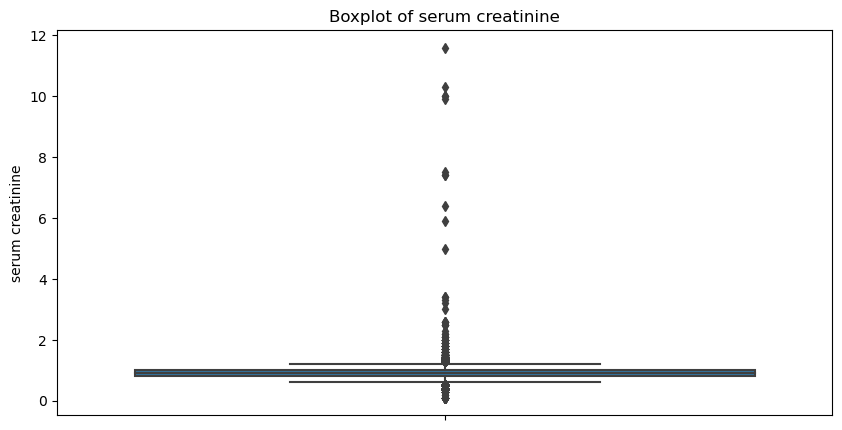

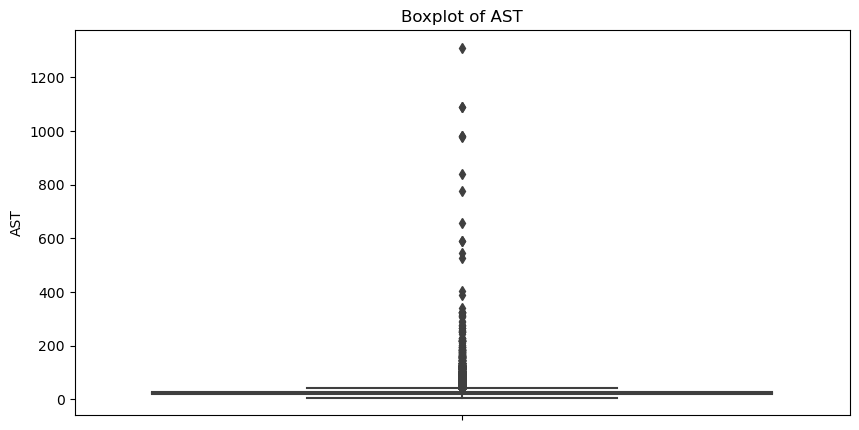

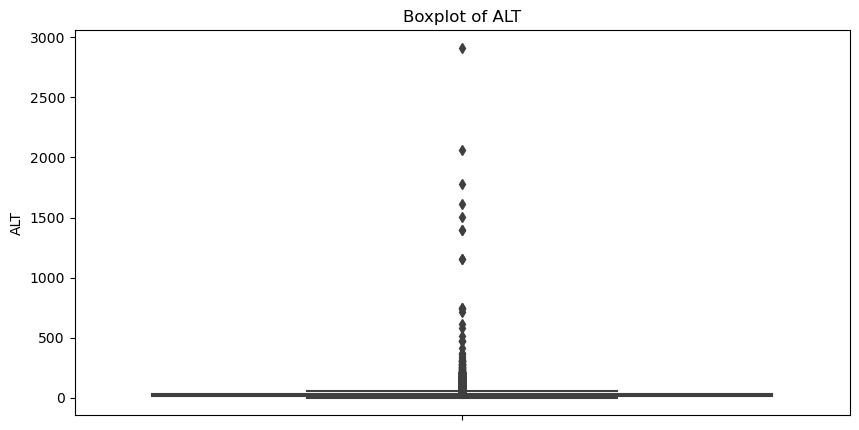

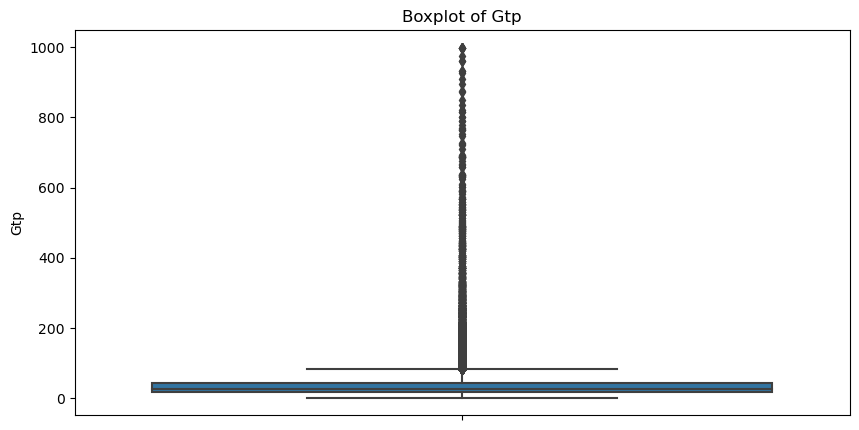

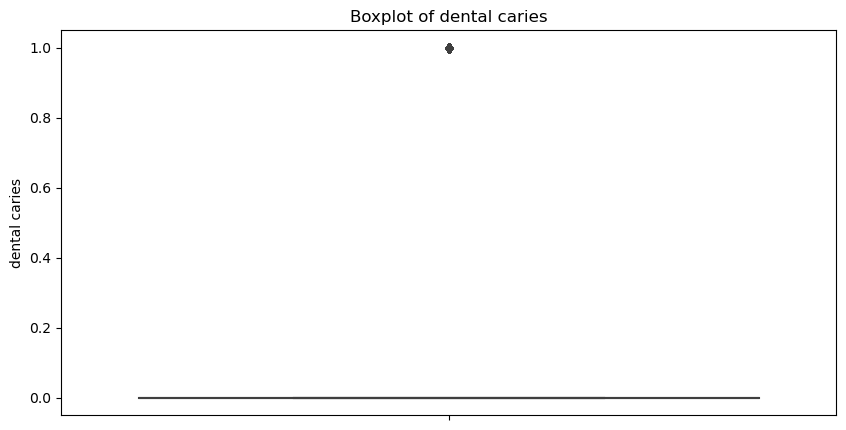

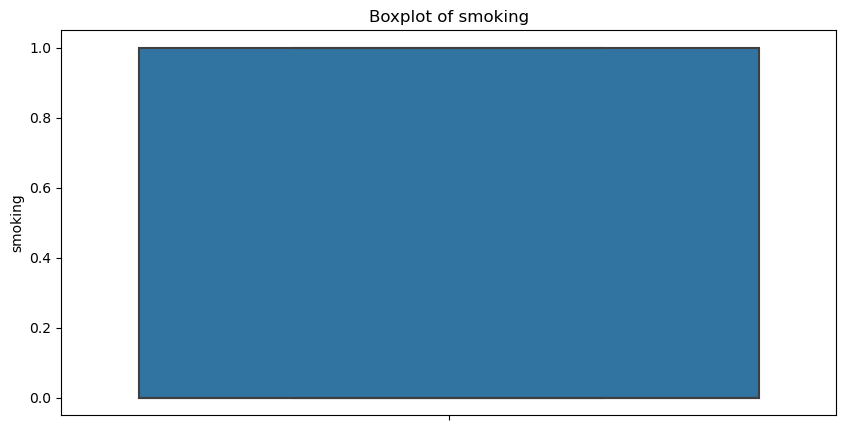

In [15]:


for col in df.columns:
    if df[col].dtypes in ['int64', 'float64']:
        plt.figure(figsize=(10, 5))  # Optionally, set the figure size for better visualization
        sns.boxplot(y=df[col])  # Plot the boxplot
        plt.title(f'Boxplot of {col}')  # Set the title to the column name
        plt.ylabel(col)  # Optionally, set the y-axis label to the column name
        plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()

# Apply the LabelEncoder to each categorical column
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])
df['dental caries'] = le.fit_transform(df['dental caries'])

# Performing One Hot Encoding for categorical features of a dataframe

# Feature Selection using feature importance

In [17]:
X = df.iloc[:,:-1]
y=df['smoking']

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [19]:
model.fit(X, y)

ExtraTreesClassifier()

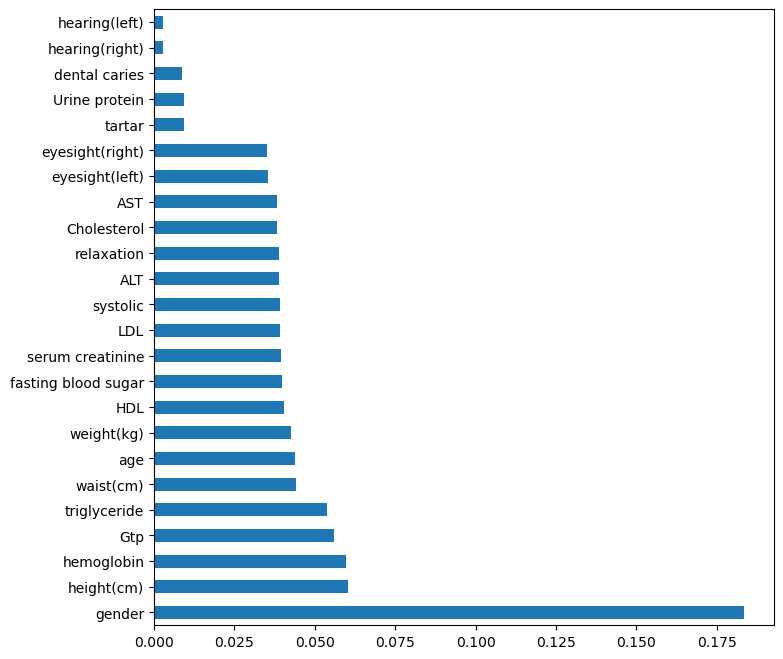

In [20]:
df1 = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize = (8, 8))
df1.nlargest(24).plot(kind='barh')
plt.show()

In [21]:
# Feature importance is a technique that calculate a score for all the input features for a given model.
# So out of 24 features we will select the top 15 features based on the score


## Logistic Regression

In [23]:
X = df[['gender', 'height(cm)', 'hemoglobin', 'Gtp', 'triglyceride', 'waist(cm)', 'HDL', 'age', 'weight(kg)', 
        'fasting blood sugar', 'serum creatinine', 'LDL', 'systolic', 'ALT', 'relaxation']]

y = df['smoking']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.7348954125145883

In [30]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.76      0.78      7027\n           1       0.63      0.69      0.66      4112\n\n    accuracy                           0.73     11139\n   macro avg       0.72      0.73      0.72     11139\nweighted avg       0.74      0.73      0.74     11139\n'

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(X_test)

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83      7027\n           1       0.70      0.71      0.70      4112\n\n    accuracy                           0.78     11139\n   macro avg       0.77      0.77      0.77     11139\nweighted avg       0.78      0.78      0.78     11139\n'

# Bagging Algorithm - Bagging Classifier

Bootstrap aggregation or bagging involves taking multiple samples from the training dataset (with replacement) and 
training model for each sample

In [38]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators = 1000)
bagging_clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\safal\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8278121913995871

In [40]:
y_pred = bagging_clf.predict(X_test)


In [41]:
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.88      0.85      0.86      7027\n           1       0.75      0.80      0.77      4112\n\n    accuracy                           0.83     11139\n   macro avg       0.81      0.82      0.82     11139\nweighted avg       0.83      0.83      0.83     11139\n'

# Bagging Algorithm - Extra Trees

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=1000, random_state = 42)
et.fit(X_train, y_train)



ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [43]:
y_pred = et.predict(X_test)

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.84      0.86      7027\n           1       0.75      0.82      0.78      4112\n\n    accuracy                           0.83     11139\n   macro avg       0.82      0.83      0.82     11139\nweighted avg       0.84      0.83      0.83     11139\n'

# Bagging Algorithm - Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [47]:
y_pred = rfc.predict(X_test)

In [48]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.85      0.86      7027\n           1       0.76      0.80      0.78      4112\n\n    accuracy                           0.83     11139\n   macro avg       0.82      0.83      0.82     11139\nweighted avg       0.83      0.83      0.83     11139\n'